In [1]:
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Funciones DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*100)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
    return signal

#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

P300S04 = scipy.io.loadmat('./dataset/P300S04.mat')                     # El P300S04.mat lo uso para comparar la estructura
p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat') 
print("-----------------------------------------")   
print("P300S04:")   
print("1. Encabezado : ", sorted(P300S04))                                      #Informativo
print("2. Tipo : ", type(P300S04))
print("-----------------------------------------")   
print("p300subject25:")   
print("1. Encabezado : ", sorted(p300subject25))                                      #Informativo
print("2. Tipo : ", type(p300subject25))
print("-----------------------------------------") 


signal = p300subject25['data'][0][0][0]    
df_signal = a_fun.to_df(signal)

t_flash = p300subject25['data'][0][0][4]                                # Flash matrix
df_t_flash = a_fun.to_df(t_flash)

signal = DrugSignal(signal, t_flash)
df_signal = a_fun.to_df(signal)

-----------------------------------------
P300S04:
1. Encabezado :  ['Fs', 'Trials', 'Word', '__globals__', '__header__', '__version__', 'channelNames', 'channelRange', 'data', 'sampleTime', 'samples', 'stims', 'subject']
2. Tipo :  <class 'dict'>
-----------------------------------------
p300subject25:
1. Encabezado :  ['C', 'Fs', 'H', 'HH', 'IC', 'IM', 'Trials', 'Word', '__globals__', '__header__', '__version__', 'a', 'ab', 'ans', 'b', 'c', 'channelNames', 'channelRange', 'channels', 'counterhits', 'counternohits', 'd', 'data', 'diffs', 'duration', 'durs', 'e', 'f', 'h', 'i', 'idx', 'idxset', 'j', 'lag', 'n', 'sampleTime', 'samples', 'samplingFreq', 'sls', 'ss', 'stims', 'stimulations', 'stimuls', 'subject', 'targets', 'total', 'trial', 'validstimuls', 'vl', 'z']
2. Tipo :  <class 'dict'>
-----------------------------------------


Ambos son de la misma clase de estructura.  
*p300subject25* contiene mas información.  
A continuación habrá una pequeña descripción de los datos:  

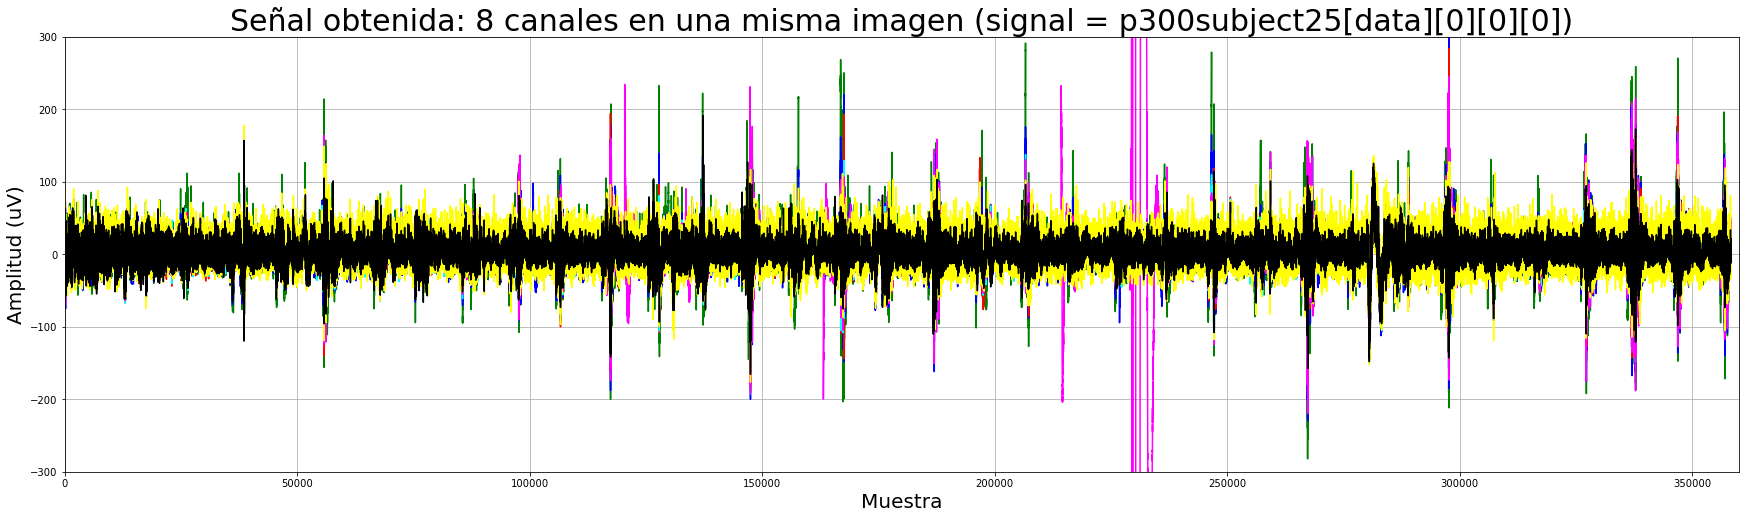

()

In [7]:
data_frame = df_signal
titulo = 'Señal obtenida: 8 canales en una misma imagen (signal = p300subject25[data][0][0][0])'
dir_savefig = "./a_images/01 - p300subject25.jpg"
a_fun.grafic_8ch(data_frame, titulo, xlabel, ylabel, dir_savefig)

In [ ]:
df_signal.describe()

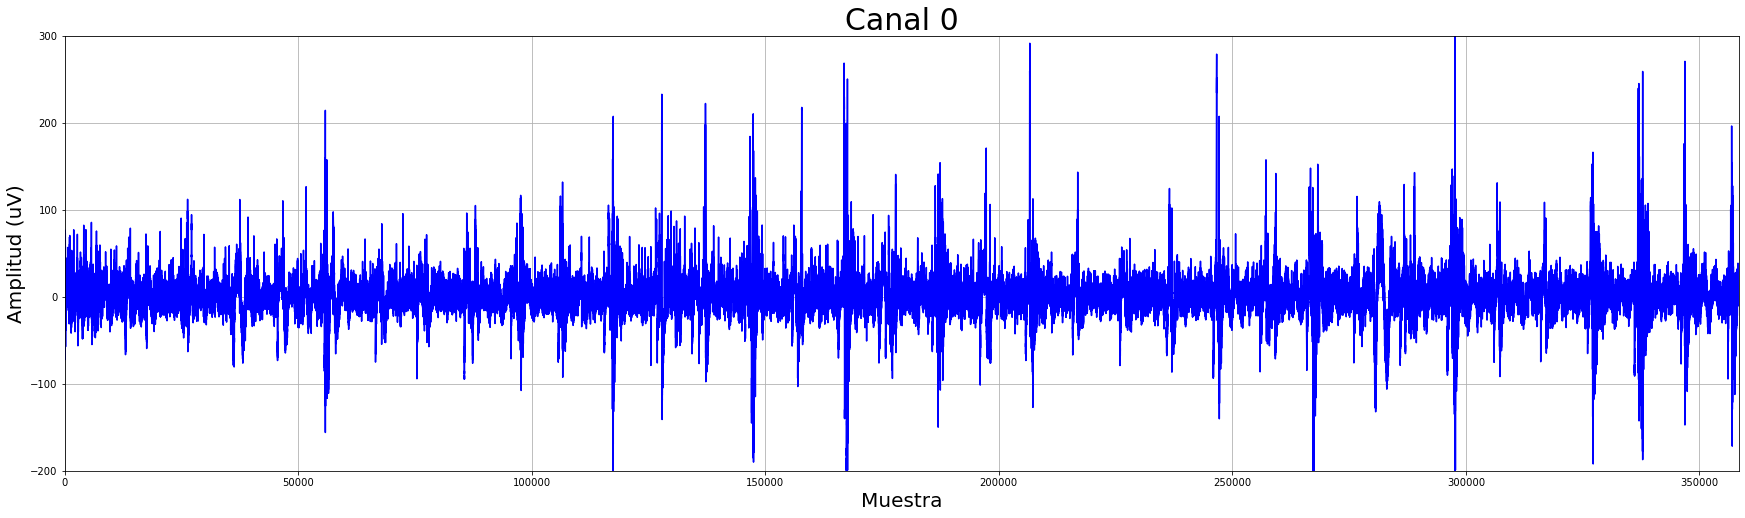

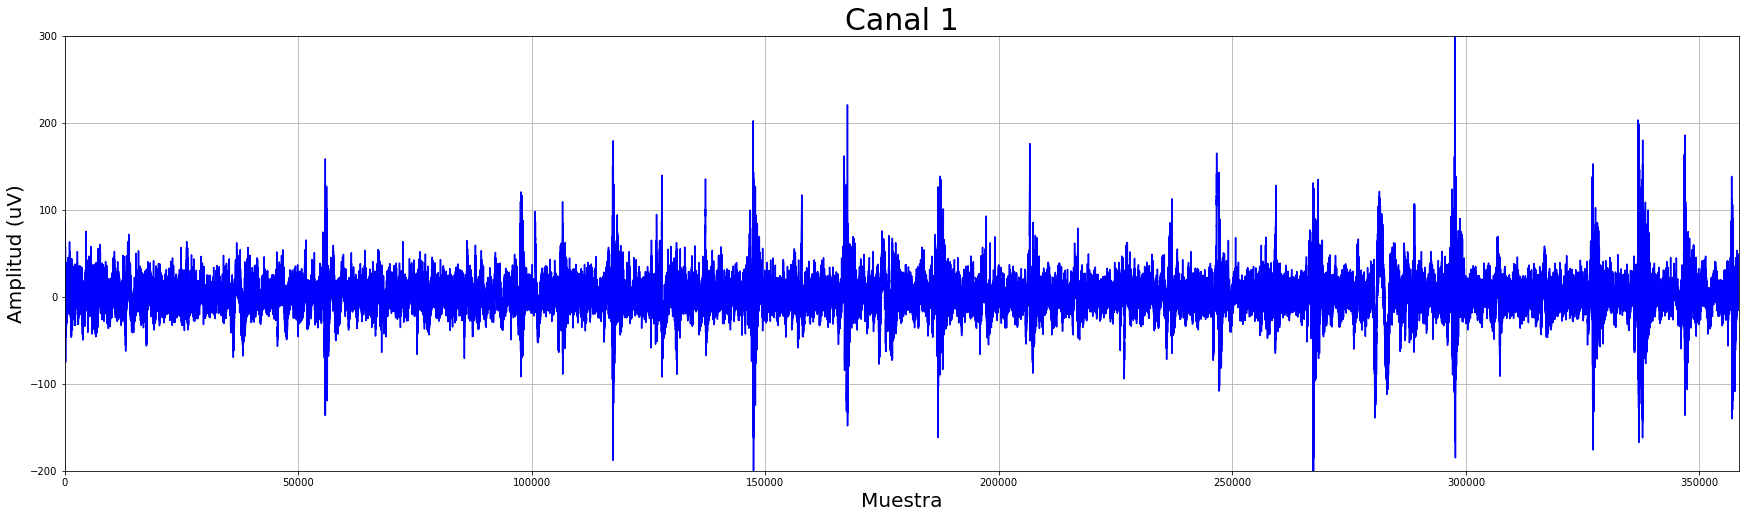

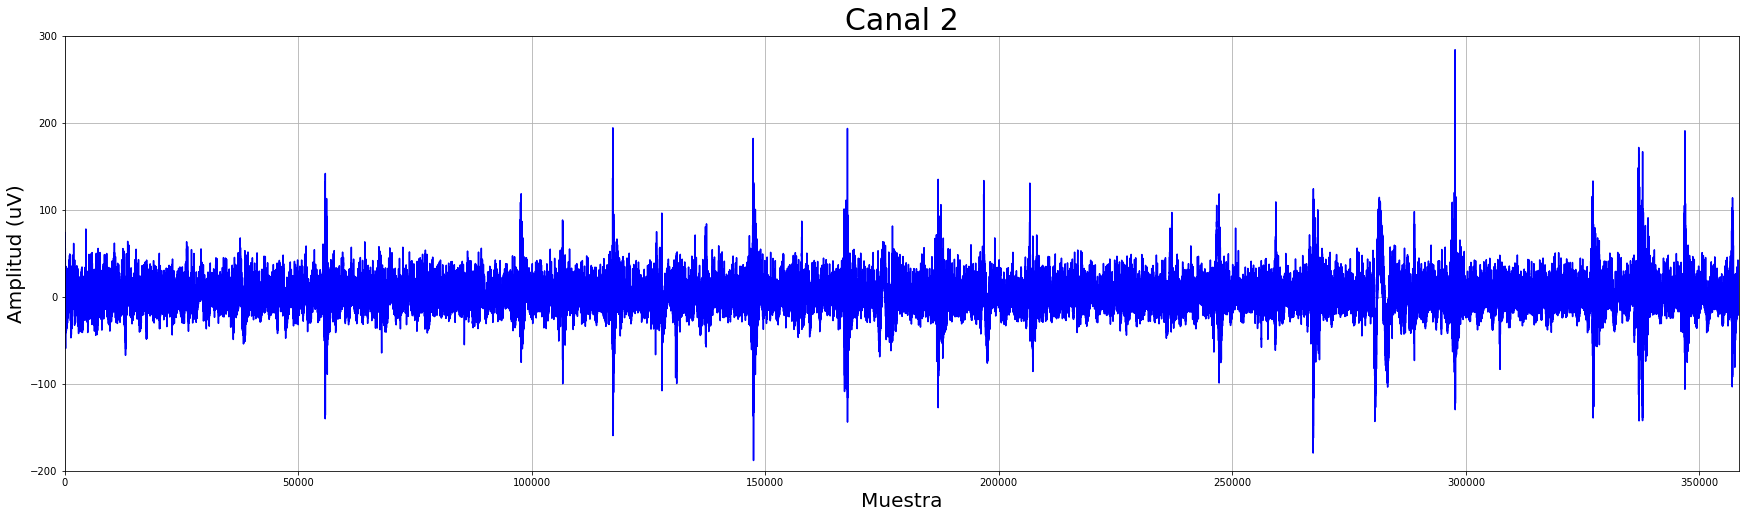

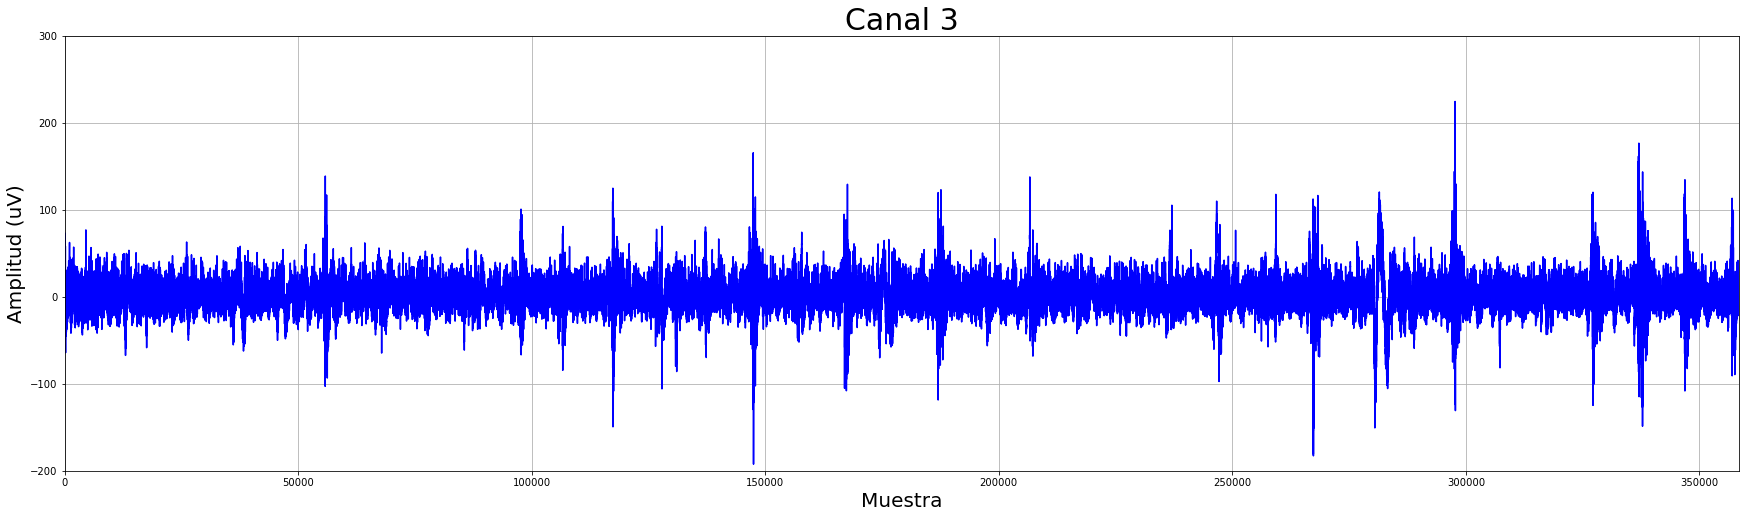

In [18]:
canal0 = 0
titulo = 'Canal 0'
dir_savefig = "./a_images/01 - p300subject25_Ch0.jpg"
a_fun.grafic_signal(data_frame, titulo, xlabel, ylabel, dir_savefig, canal0)  

canal1 = 1
titulo = 'Canal 1'
dir_savefig = "./a_images/01 - p300subject25_Ch1.jpg"
a_fun.grafic_signal(data_frame, titulo, xlabel, ylabel, dir_savefig, canal1)  

canal2 = 2
titulo = 'Canal 2'
dir_savefig = "./a_images/01 - p300subject25_Ch2.jpg"
a_fun.grafic_signal(data_frame, titulo, xlabel, ylabel, dir_savefig, canal2)  

canal3 = 3
titulo = 'Canal 3'
dir_savefig = "./a_images/01 - p300subject25_Ch3.jpg"
a_fun.grafic_signal(data_frame, titulo, xlabel, ylabel, dir_savefig, canal3)  

#### Análisis de las señales t_stim & t_type (p300-subject-25.mat)
Provienen de p300-subject-25.mat  :  p300subject25['data'][0][0][2] y p300subject25['data'][0][0][1].  
  
El estímulo, t_stim, es una señal periódica, con pulsos de distinta amplitud:  
Desde 1mV a 12mV, en intervalos de 1mV.
Un solo canal.  
El periodo es de unas 7500 muestras.  

t_type también es una señal periódica, con pulsos de distintas amplitudes pero menos que t_stim:  
Sólo hay variaciones en 1mV y 2mV.
Un solo canal.  
El periodo es de unas 7500 muestras.  


In [ ]:
p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')
t_stim = a_fun.to_df(p300subject25['data'][0][0][2])                # t_stim = mat['data'][0][0][2]
t_type = a_fun.to_df(p300subject25['data'][0][0][1])                # t_type = mat['data'][0][0][1]
#t_stim.head(20)
#t_type.head(20)

In [ ]:
# Gráfico del estímulo (t_stim)
plt.figure(figsize=(30,8))
plt.plot(t_stim['sample'], t_stim[0], color[0])
#plt.xlim([7400,15100])
#plt.ylim([-1,13])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
plt.plot(t_stim['sample'], t_stim[0], color[0])
plt.xlim([7400,15100]), plt.ylim([-1,13])
plt.grid(), plt.show()

# Gráfico de t_type
plt.figure(figsize=(30,8))
plt.plot(t_type['sample'], t_type[0], color[1])
#plt.xlim([7400,15100]), #plt.ylim([-1,13])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
plt.plot(t_type['sample'], t_type[0], color[1])
plt.xlim([7200,15200]), plt.ylim([-0.5,2.5])
plt.grid(), plt.show()


In [ ]:
ch_names=[ 'Fz'  ,  'Cz',    'P3' ,   'Pz'  ,  'P4'  ,  'PO7'   , 'PO8'   , 'Oz']
ch_types= ['eeg'] * signal.shape[1] # Cantidad de columnas. Resultado: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']

ch_names_events = ch_names + ['t_stim']+ ['t_type'] # ['Fz', 'Cz', 'P3', 'Pz', 'P4', 'PO7', 'PO8', 'Oz', 't_stim', 't_type']
ch_types_events = ch_types + ['misc'] + ['misc'] # ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'misc', 'misc']

signal_events = np.concatenate([signal, t_stim, t_type],1)
info_events = mne.create_info(ch_names_events,250, ch_types_events)
eeg = mne.io.RawArray(signal_events.T, info_events)  # Le agrega Duration	00:23:53 (HH:MM:SS). Única diferencia con info_events

In [ ]:
df_signal_events = a_fun.to_df(signal_events)   
df_signal_events.head(5)

In [ ]:
info_events

In [ ]:
eeg